This Jupyter Notebook goes through the stages required in Python to:
- Import share data from the internet
- Calculate the Bollinger Bands for a stock
- Plot the Bollinger Bands and rolling mean

In [1]:
# Import required modules
import pandas as pd
import numpy as np
from datetime import datetime
import mplfinance as mfp
import pandas_datareader as pdr

In [2]:
#Import share data
start = datetime(1988,7,1)
end = datetime(2022,6,1)
pdr_bae_data = pdr.DataReader("BA.L",'yahoo',start,end)

In [3]:
#Calculate Bollinger Band parameters

days_window = 20 #Set the window of days that the variables be assessed over
no_stdev = 2 #Set the number of standard deviations separation for the high and low bands

pdr_bae_data['Rolling_Mean'] = pdr_bae_data['Close'].rolling(days_window).mean()
pdr_bae_data['Rolling_Stdev'] = pdr_bae_data['Close'].rolling(days_window).std()
pdr_bae_data['Boll_High'] = pdr_bae_data['Rolling_Mean'] + (pdr_bae_data['Rolling_Stdev'] * no_stdev)
pdr_bae_data['Boll_Low'] = pdr_bae_data['Rolling_Mean'] - (pdr_bae_data['Rolling_Stdev'] * no_stdev)

pdr_bae_data

,High,Low,Open,Close,Volume,Adj Close,Rolling_Mean,Rolling_Stdev,Boll_High,Boll_Low
Date,,,,,,,,,,
1988-07-01,100.918602,100.918602,100.918602,100.918602,0.0,34.474155,NaN,NaN,NaN,NaN
1988-07-04,100.918602,100.918602,100.918602,100.918602,0.0,34.474155,NaN,NaN,NaN,NaN
1988-07-05,102.384804,102.384804,102.384804,102.384804,0.0,34.975018,NaN,NaN,NaN,NaN
1988-07-06,100.674301,100.674301,100.674301,100.674301,0.0,34.390701,NaN,NaN,NaN,NaN
1988-07-07,98.963799,98.963799,98.963799,98.963799,0.0,33.806385,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-05-26,771.000000,763.000000,763.000000,771.000000,5179317.0,771.000000,752.929996,12.008114,776.946225,728.913767
2022-05-27,777.400024,766.200012,768.000000,766.799988,6744046.0,766.799988,754.689996,11.274462,777.238920,732.141073
2022-05-30,772.400024,758.599976,766.000000,761.599976,8815339.0,761.599976,755.769995,10.818552,777.407099,734.132891


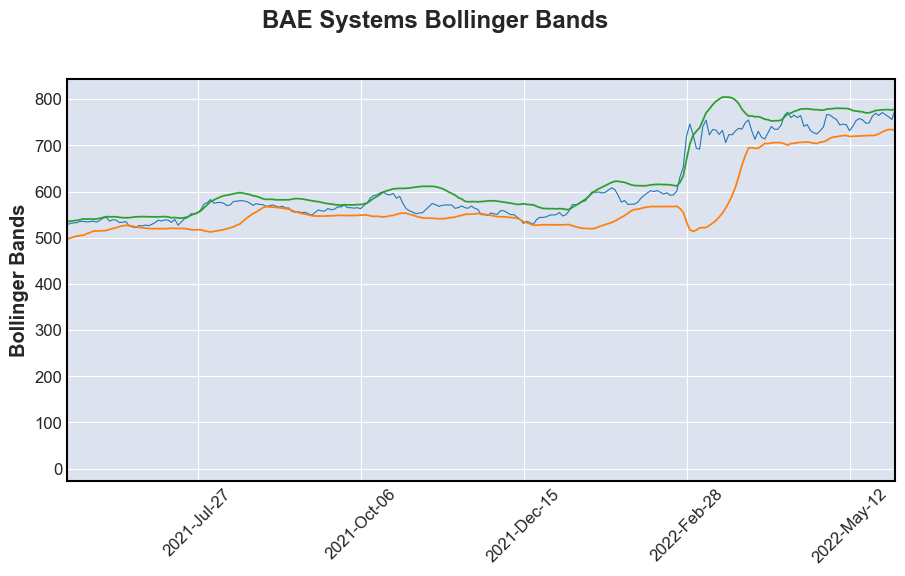

In [4]:
#Plot the Bolling Bands using mplfinance
high_low = pdr_bae_data[['Boll_Low','Boll_High']]
apd = mfp.make_addplot(high_low)

kwargs = dict(title = 'BAE Systems Bollinger Bands', type='line',
              ylabel = 'Bollinger Bands',figratio=(2,1),figscale=1,xlim=(datetime(2021,6,1),end))

mfp.plot(pdr_bae_data, addplot=apd, **kwargs)